In [37]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Embedded Method

In [43]:
# Feature Selection Pipeline
def select_features_rf(df, asset_name="Asset"):
    """
    Performs feature selection using a Random Forest regressor to extract feature importances for a given asset's DataFrame.

    Required Features: All features of the asset and performs additional engineering (e.g., moving averages).
    Parameters:
        df (pd.DataFrame): The input DataFrame for the asset.
        asset_name (str): Identifier for plotting and output.

    Returns:
        feat_importances (pd.Series): Feature importances sorted in descending order.
    """
    # 1. Preprocessing and Feature Engineering
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date').reset_index(drop=True)

    # Add indicators that improve models to predict better (e.g., 5-day and 10-day moving averages)
    df['MA_5'] = df['Close'].rolling(window=5, min_periods=1).mean()
    df['MA_10'] = df['Close'].rolling(window=10, min_periods=1).mean()
    df['MA_20'] = df['Close'].rolling(window=20, min_periods=1).mean()
    df['MA_50'] = df['Close'].rolling(window=50, min_periods=1).mean()
    df['52W_High'] = df['High'].rolling(window=252, min_periods=1).max()
    df['52W_Low'] = df['Low'].rolling(window=252, min_periods=1).min()

    # Define feature columns and target variable
    features = [col for col in df.columns if col not in ['Date', 'Close', 'Series']]
    target = 'Close'

    new_df = df.dropna()
    X = new_df[features]
    y = new_df[target]

    # 2. Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    # 3. Train a Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=123)
    rf.fit(X_train, y_train)

    # 4. Extract and Plot Feature Importances
    importances = rf.feature_importances_
    feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

    print(f"\n{asset_name} - Feature Importances:")
    print(feat_importances)

    plt.figure(figsize=(12, 6))
    ax = feat_importances.plot(kind='bar', title=f'Feature Importances - {asset_name}')
    plt.ylabel('Importance Score')
    plt.xticks(rotation=90)

    # Add rounded importance values as labels on bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=8, fontweight='bold')
    plt.tight_layout()
    plt.show()

    return feat_importances

### Feature Selection for Indexes

### Feature Selection for Each Index ###

Processing Index: NSEI

Index: NSEI - Feature Importances:
Low                        0.198901
High                       0.164955
52W_High                   0.155856
MA_5                       0.147230
Open                       0.124964
MA_10                      0.113816
MA_50                      0.047413
MA_20                      0.046784
52W_Low                    0.000058
Percent_Change_In_Price    0.000019
Volume                     0.000004
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


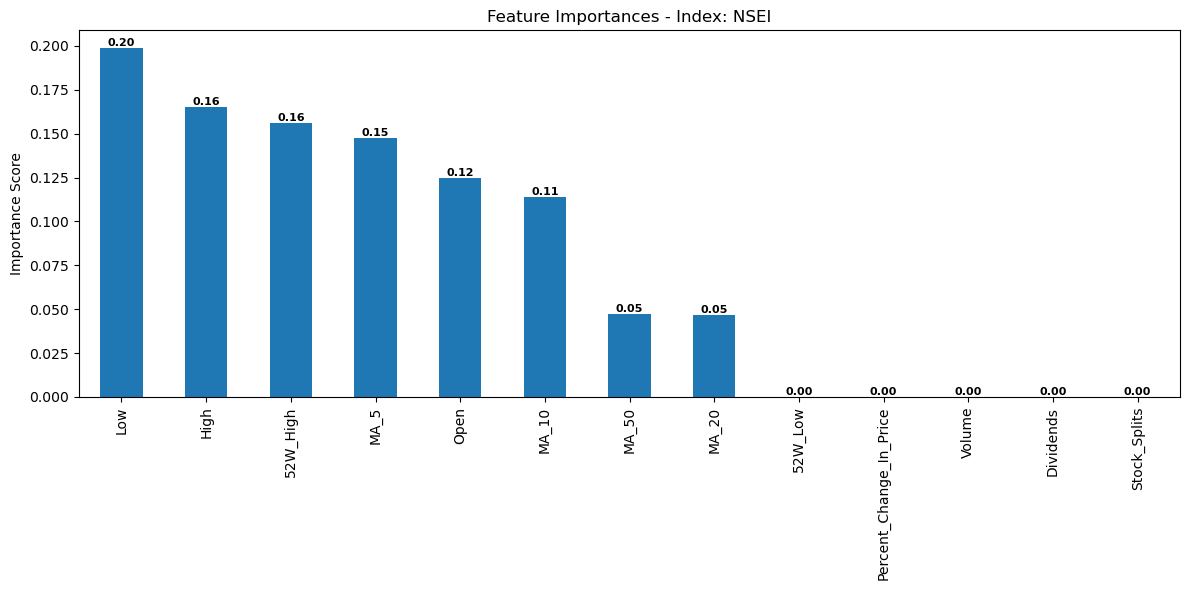


Processing Index: NSEBANK

Index: NSEBANK - Feature Importances:
High                       0.682563
Low                        0.275220
MA_5                       0.024235
Open                       0.010772
MA_20                      0.003588
MA_50                      0.001845
MA_10                      0.001133
52W_High                   0.000608
Percent_Change_In_Price    0.000030
Volume                     0.000005
52W_Low                    0.000002
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


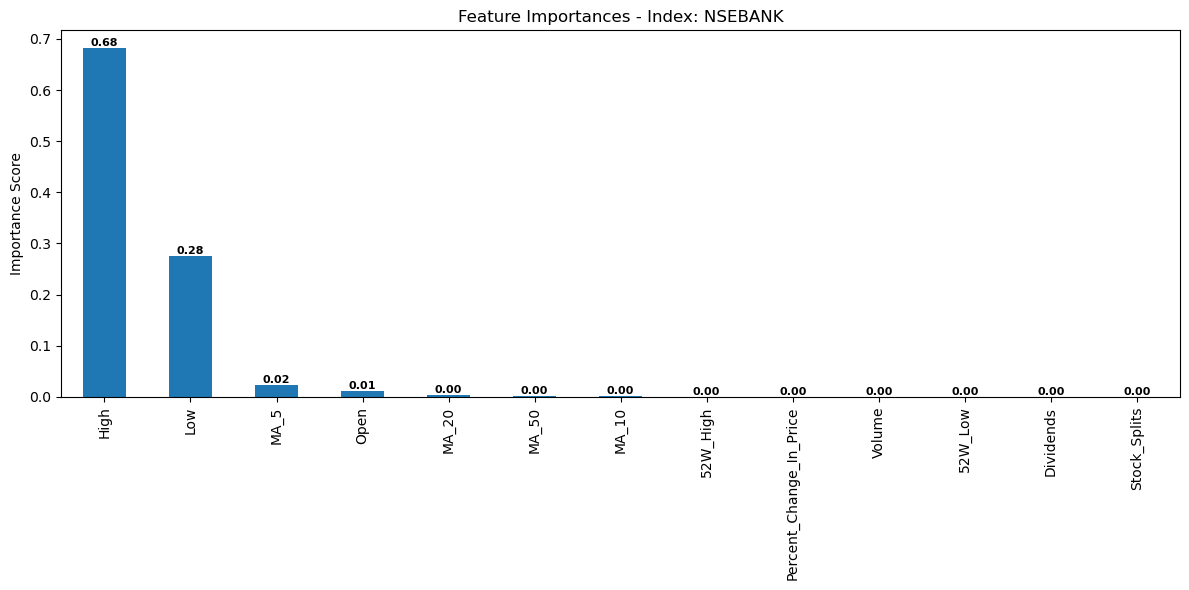


Processing Index: CNXIT

Index: CNXIT - Feature Importances:
High                       0.201027
Open                       0.159091
Low                        0.147844
52W_High                   0.141508
MA_5                       0.108532
MA_50                      0.108292
MA_10                      0.100322
MA_20                      0.033353
Percent_Change_In_Price    0.000025
Volume                     0.000004
52W_Low                    0.000002
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


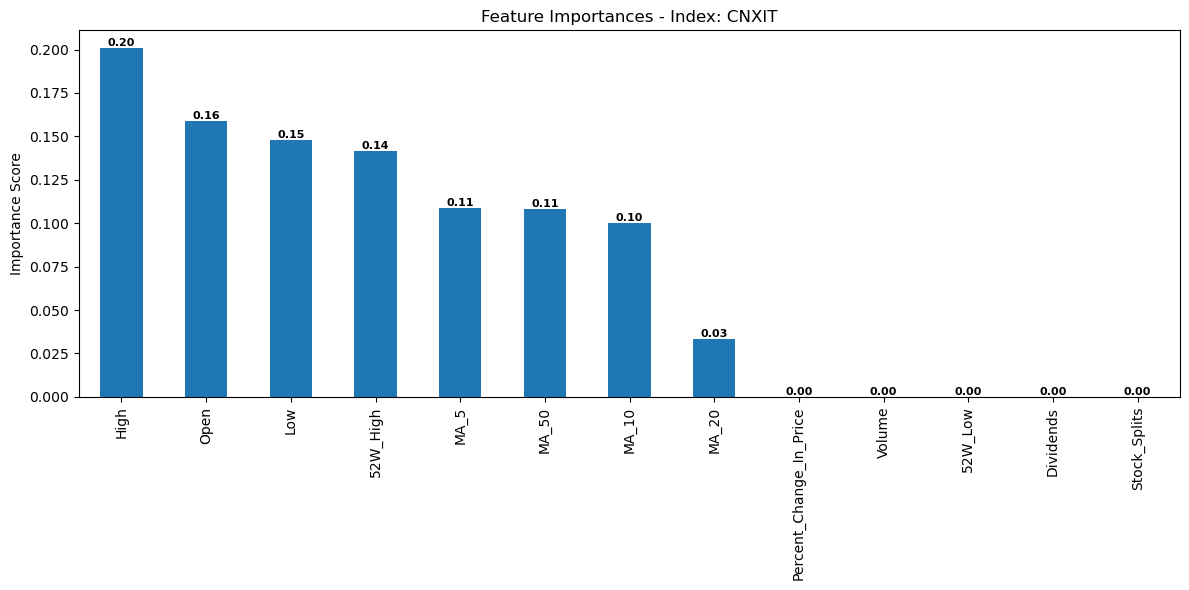


Processing Index: BSESN

Index: BSESN - Feature Importances:
High                       0.627202
Low                        0.333492
MA_5                       0.014919
Open                       0.011231
52W_High                   0.004929
MA_10                      0.004200
MA_20                      0.002592
MA_50                      0.001182
52W_Low                    0.000240
Percent_Change_In_Price    0.000011
Volume                     0.000002
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


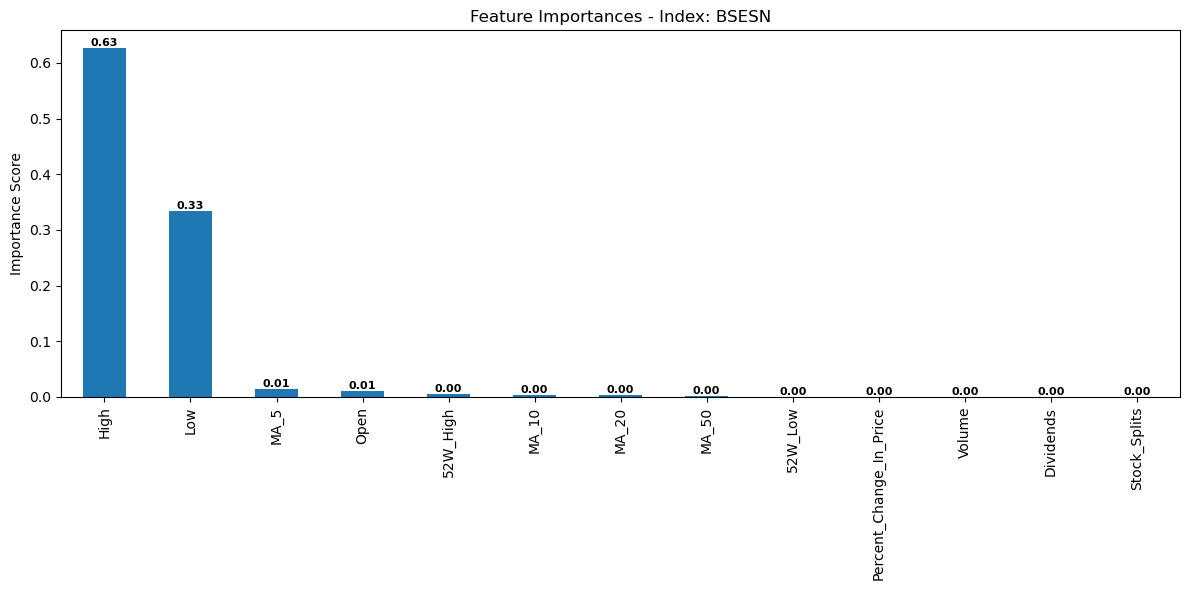


Processing Index: NIFTY_MIDCAP_100

Index: NIFTY_MIDCAP_100 - Feature Importances:
Low                        5.955036e-01
High                       2.102143e-01
Open                       4.379770e-02
MA_50                      3.646775e-02
52W_High                   3.604233e-02
MA_5                       3.454909e-02
MA_10                      2.347613e-02
MA_20                      1.992523e-02
Percent_Change_In_Price    1.570355e-05
52W_Low                    8.188162e-06
Volume                     4.569880e-08
Dividends                  0.000000e+00
Stock_Splits               0.000000e+00
dtype: float64


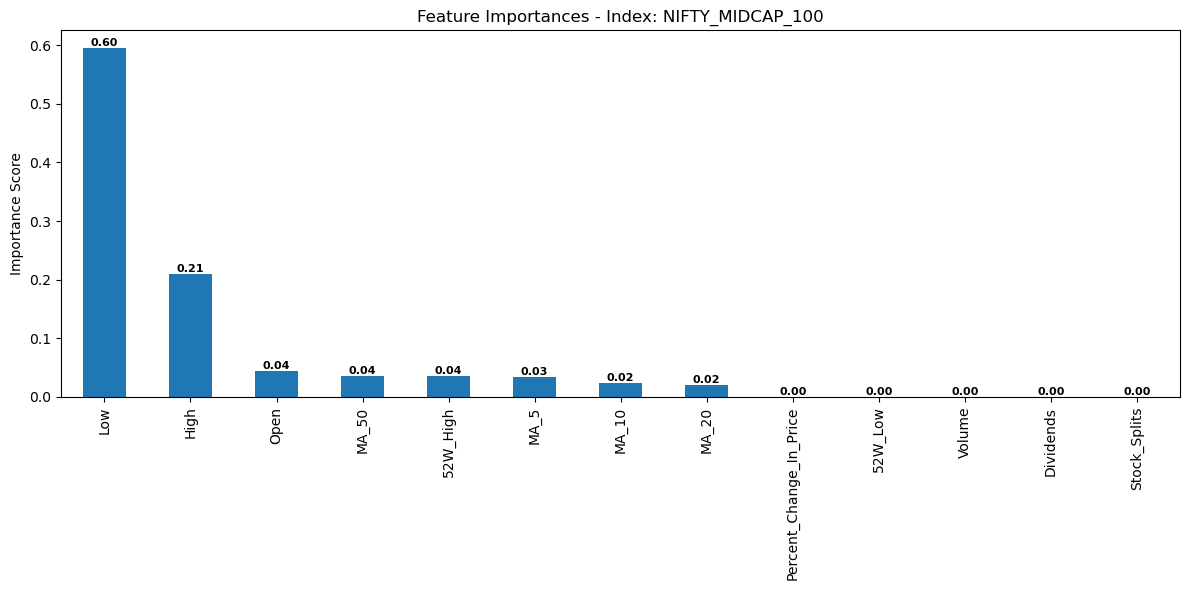


Processing Index: CNXPSUBANK

Index: CNXPSUBANK - Feature Importances:
High                       0.536592
Low                        0.246048
MA_5                       0.069530
52W_High                   0.040829
Open                       0.036988
MA_50                      0.034846
MA_10                      0.021173
MA_20                      0.013684
Percent_Change_In_Price    0.000260
Volume                     0.000039
52W_Low                    0.000012
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


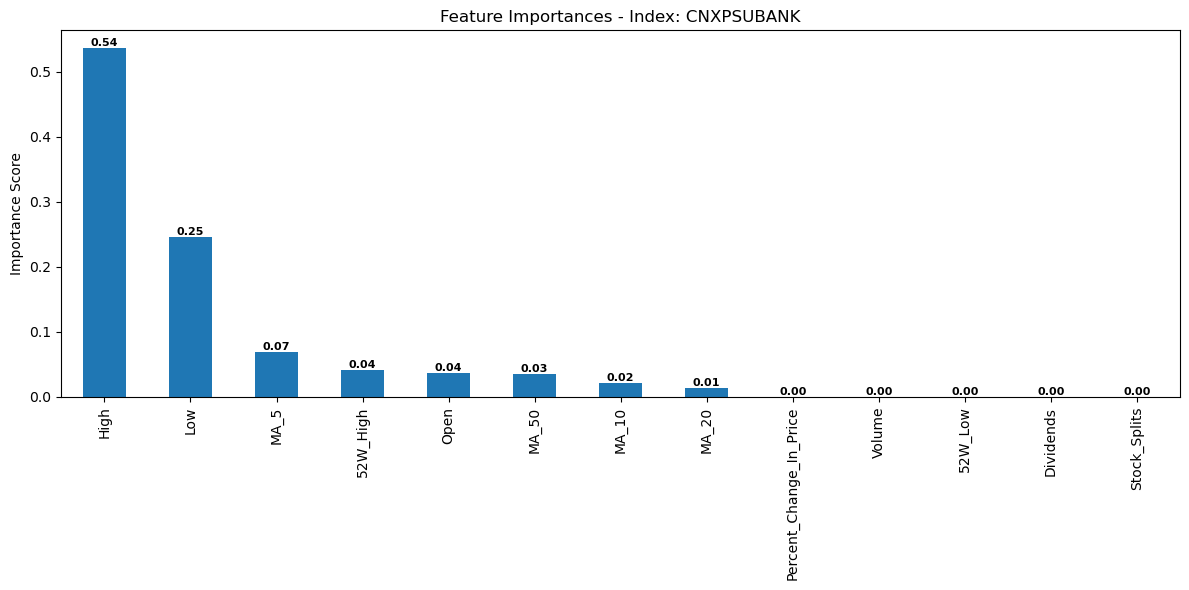


Processing Index: CNXAUTO

Index: CNXAUTO - Feature Importances:
High                       0.321890
Low                        0.259728
Open                       0.089102
MA_5                       0.085262
MA_50                      0.077139
52W_High                   0.064377
MA_10                      0.058917
52W_Low                    0.027166
MA_20                      0.016368
Percent_Change_In_Price    0.000043
Volume                     0.000009
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


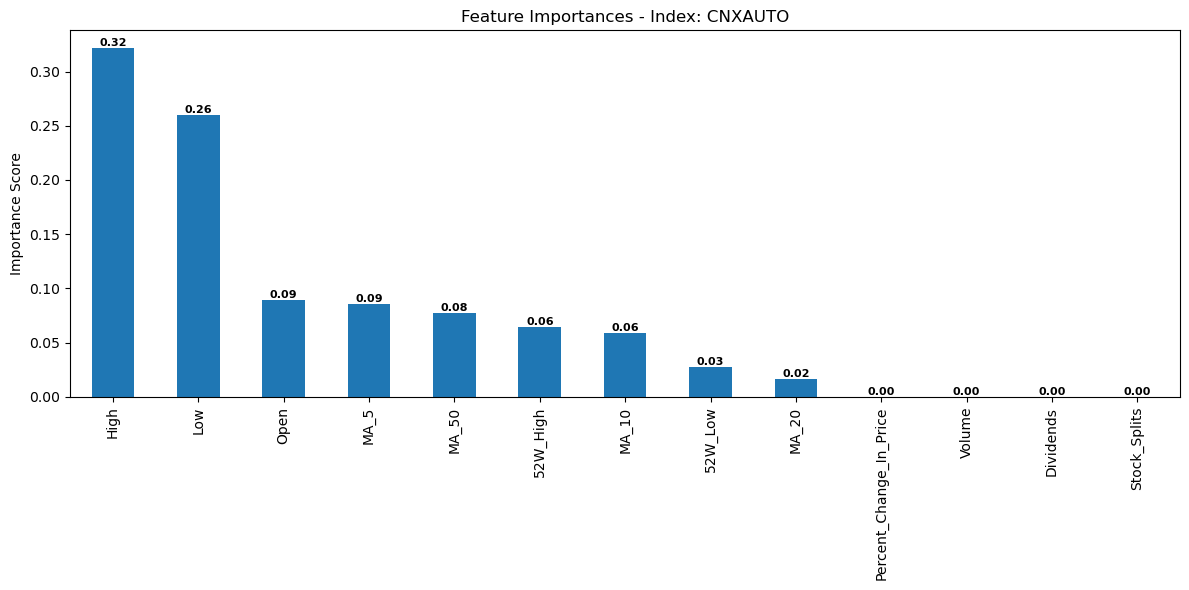


Processing Index: NIFTY_FIN_SERVICE

Index: NIFTY_FIN_SERVICE - Feature Importances:
Low                        0.526533
High                       0.315510
Open                       0.152092
MA_5                       0.003718
MA_20                      0.001328
MA_10                      0.000543
MA_50                      0.000233
Percent_Change_In_Price    0.000029
52W_High                   0.000007
Volume                     0.000006
52W_Low                    0.000002
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


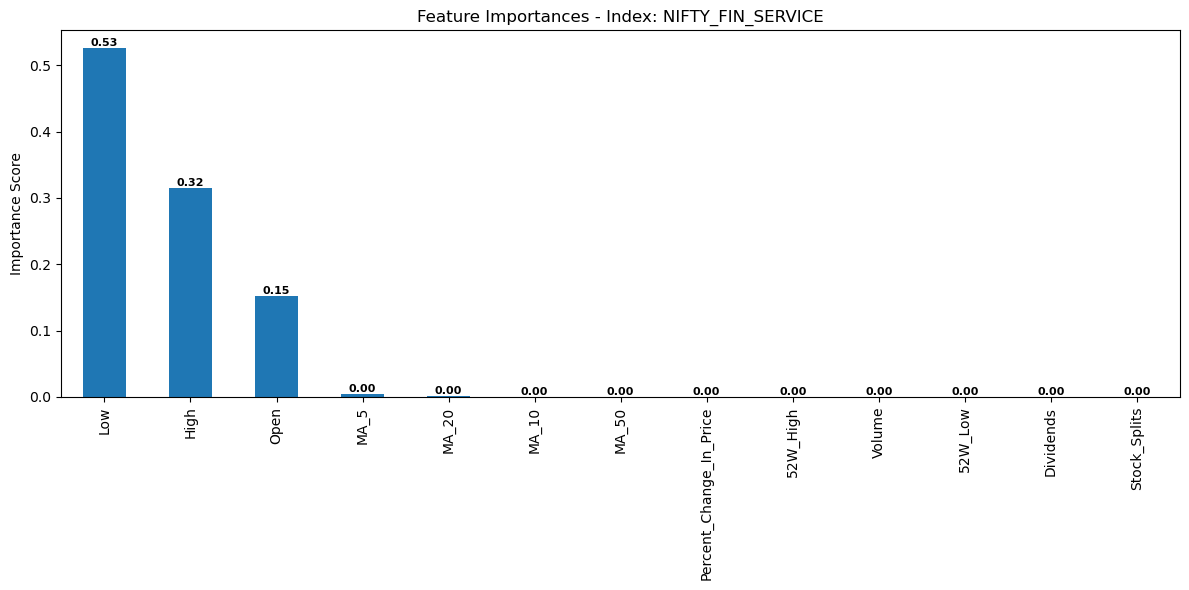

Low                        0.526533
High                       0.315510
Open                       0.152092
MA_5                       0.003718
MA_20                      0.001328
MA_10                      0.000543
MA_50                      0.000233
Percent_Change_In_Price    0.000029
52W_High                   0.000007
Volume                     0.000006
52W_Low                    0.000002
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64

In [39]:
index_excel_file = '../Data/Index_Data.xlsx'
all_indexes = pd.read_excel(index_excel_file, sheet_name=None)

print("### Feature Selection for Each Index ###")
for sheet_name, df in all_indexes.items():
    asset_identifier = f"Index: {sheet_name}"
    print(f"\nProcessing {asset_identifier}")
    feat_imp = select_features_rf(df, asset_name=asset_identifier)
    
feat_imp

### Feature Selection for Mutual Funds

### Feature Selection for Each Mutual Fund ###

Processing Mutual Fund: 0P00005WL6

Mutual Fund: 0P00005WL6 - Feature Importances:
Low                        0.310777
Open                       0.299065
High                       0.255671
52W_High                   0.041639
MA_5                       0.029340
MA_10                      0.023326
MA_50                      0.022506
MA_20                      0.017483
52W_Low                    0.000186
Percent_Change_In_Price    0.000007
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


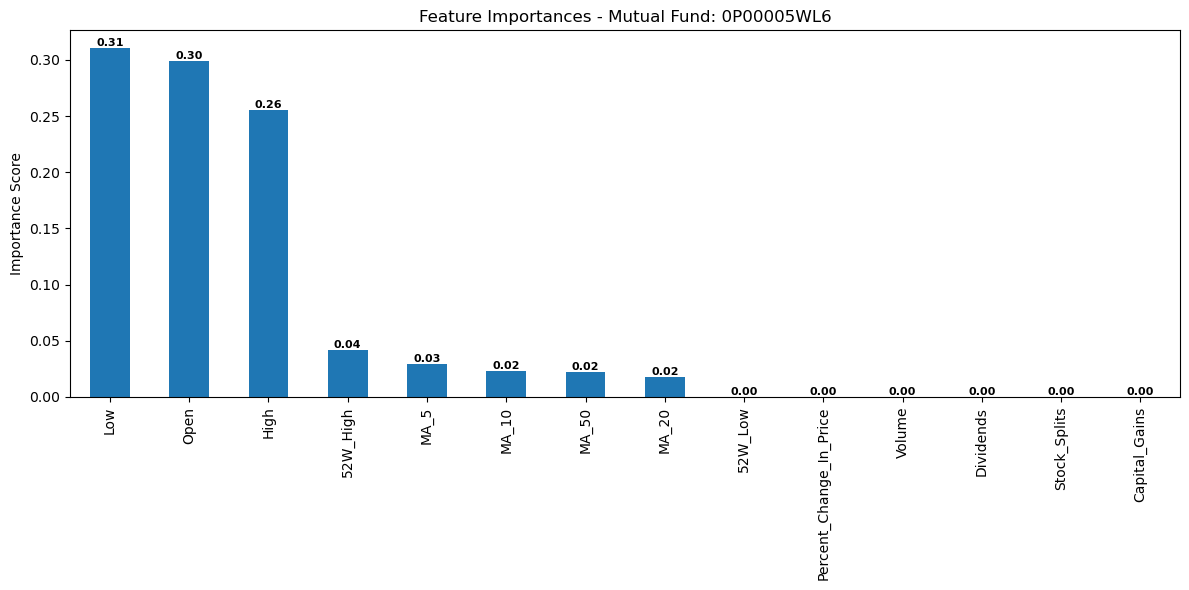


Processing Mutual Fund: UTINEXT50

Mutual Fund: UTINEXT50 - Feature Importances:
High                       0.370259
Open                       0.303661
Low                        0.226528
MA_5                       0.023547
MA_10                      0.018908
52W_Low                    0.014594
MA_50                      0.013625
Volume                     0.012423
52W_High                   0.008702
MA_20                      0.007409
Percent_Change_In_Price    0.000346
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


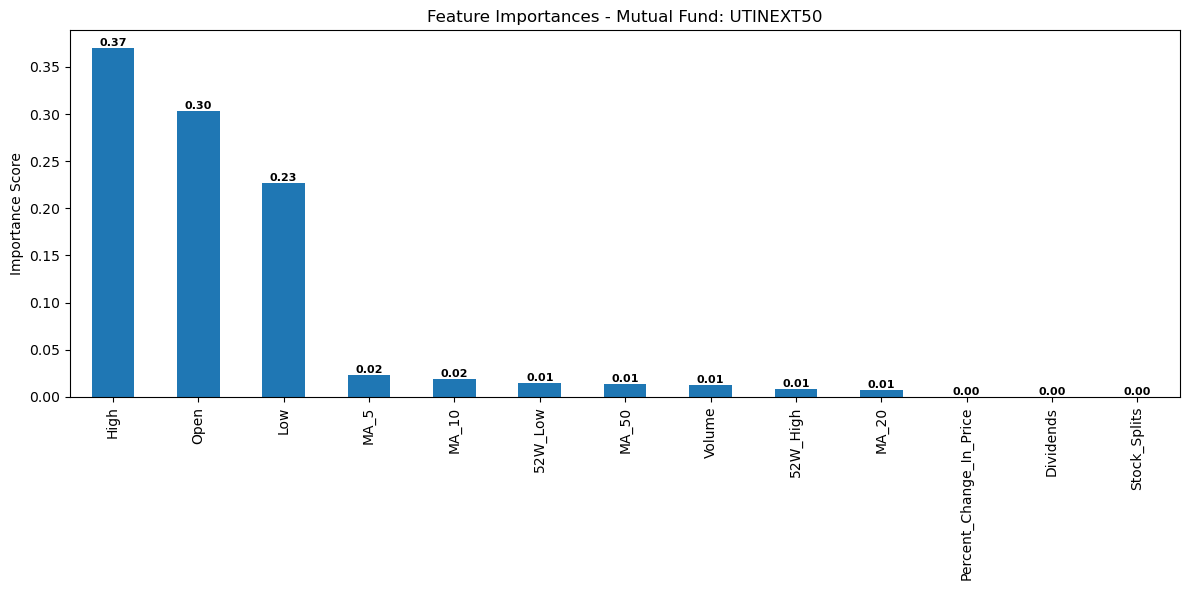


Processing Mutual Fund: 0P0000MLHH

Mutual Fund: 0P0000MLHH - Feature Importances:
Open                       0.330930
Low                        0.326413
High                       0.272810
MA_20                      0.021574
MA_5                       0.018606
52W_High                   0.013560
MA_10                      0.010762
MA_50                      0.005320
52W_Low                    0.000022
Percent_Change_In_Price    0.000004
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


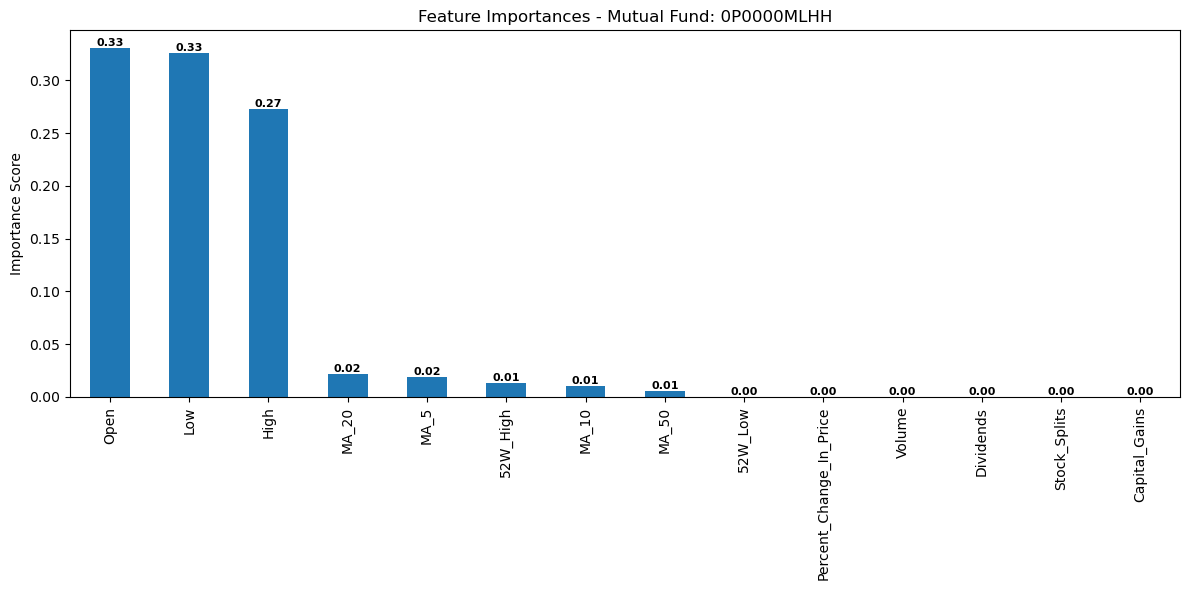


Processing Mutual Fund: 0P0000KV39

Mutual Fund: 0P0000KV39 - Feature Importances:
Open                       0.304577
Low                        0.293063
High                       0.249621
MA_5                       0.054798
MA_10                      0.032707
52W_High                   0.029101
MA_50                      0.026823
MA_20                      0.009187
52W_Low                    0.000121
Percent_Change_In_Price    0.000003
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


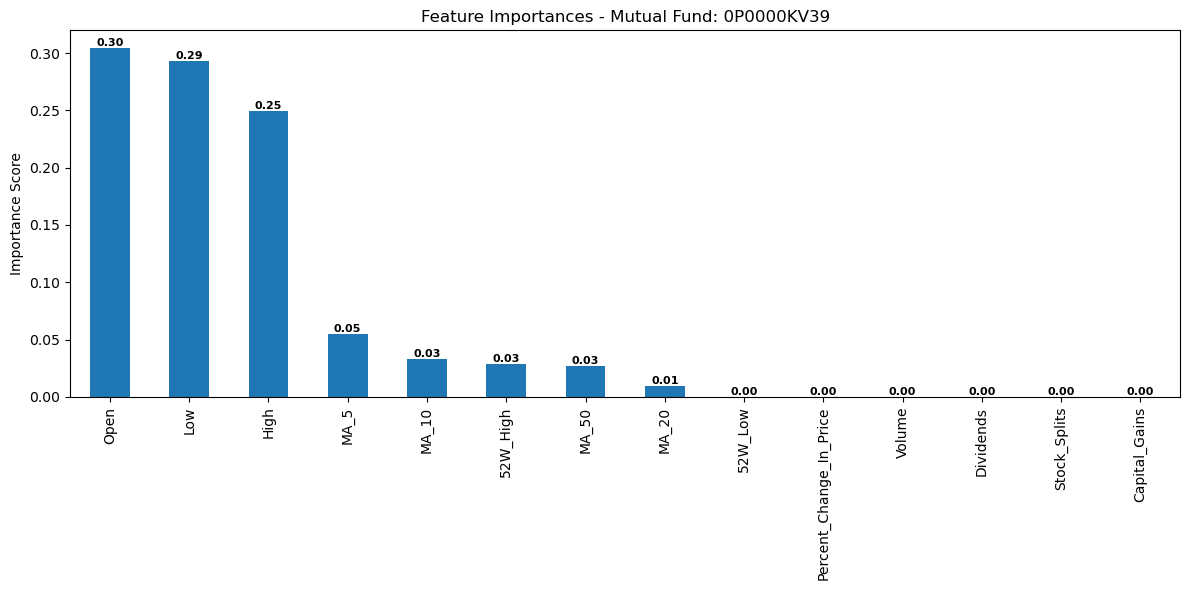


Processing Mutual Fund: 0P00009J3K

Mutual Fund: 0P00009J3K - Feature Importances:
Open                       0.222063
Low                        0.221093
High                       0.190243
MA_5                       0.101554
52W_High                   0.093110
MA_10                      0.069879
MA_50                      0.055115
MA_20                      0.046851
52W_Low                    0.000088
Percent_Change_In_Price    0.000005
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


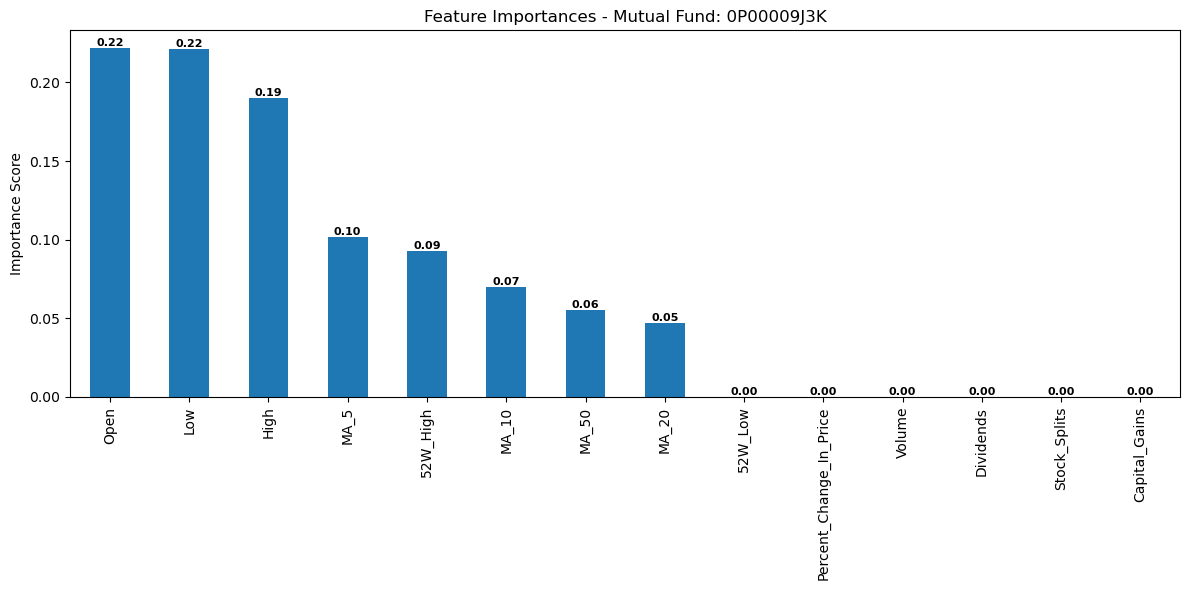


Processing Mutual Fund: 0P0001BAB5

Mutual Fund: 0P0001BAB5 - Feature Importances:
Low                        2.544951e-01
Open                       2.476791e-01
High                       2.320735e-01
MA_5                       1.062609e-01
MA_10                      6.568075e-02
MA_20                      3.669628e-02
MA_50                      3.489058e-02
52W_High                   2.048312e-02
52W_Low                    1.734152e-03
Percent_Change_In_Price    6.252894e-06
Dividends                  1.979934e-07
Volume                     0.000000e+00
Stock_Splits               0.000000e+00
Capital_Gains              0.000000e+00
dtype: float64


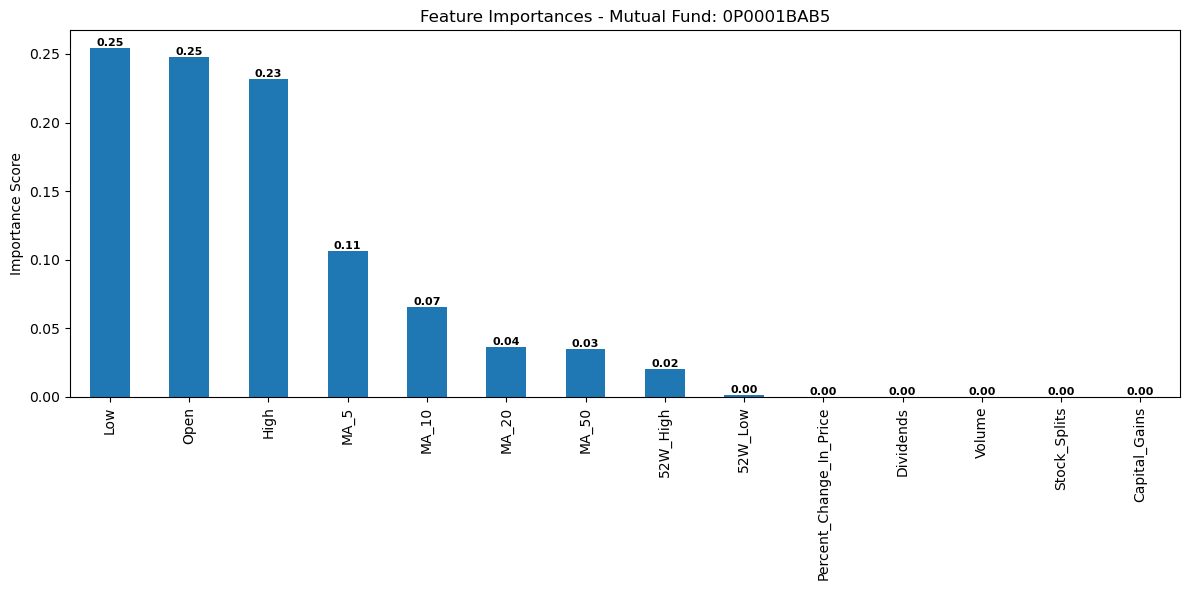


Processing Mutual Fund: 0P0001EI18

Mutual Fund: 0P0001EI18 - Feature Importances:
Low                        0.312824
Open                       0.302922
High                       0.273422
MA_5                       0.033647
52W_High                   0.030140
MA_20                      0.018693
MA_50                      0.015894
MA_10                      0.012312
52W_Low                    0.000142
Percent_Change_In_Price    0.000004
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


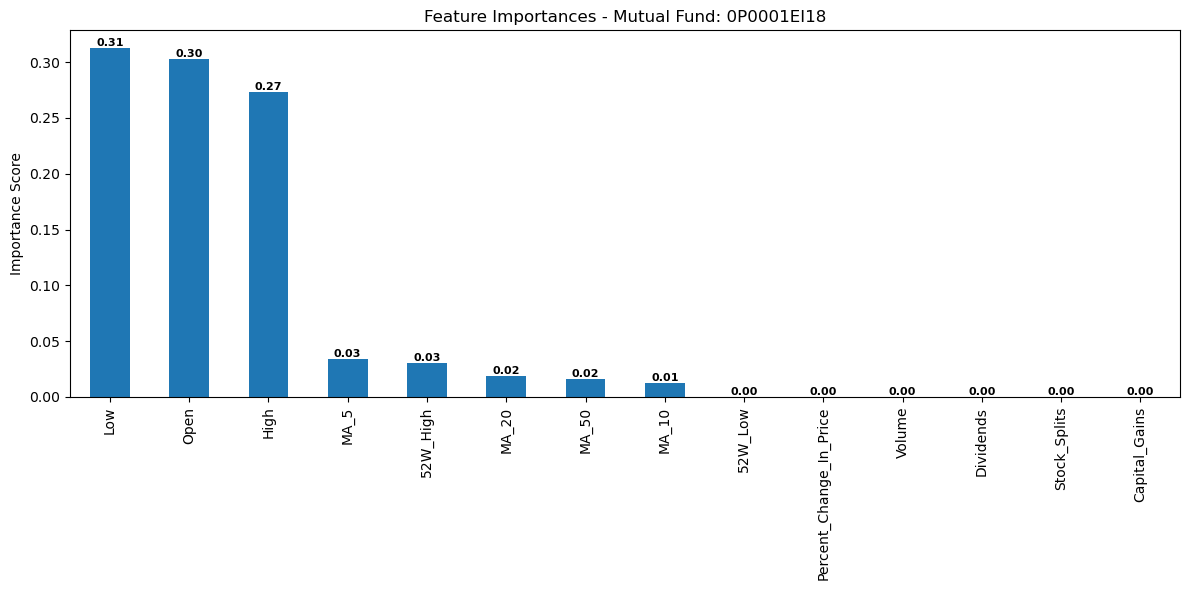


Processing Mutual Fund: 0P0001BA1R

Mutual Fund: 0P0001BA1R - Feature Importances:
High                       2.957001e-01
Open                       2.616676e-01
Low                        2.608087e-01
MA_5                       6.260627e-02
52W_High                   3.892433e-02
MA_20                      3.675582e-02
MA_10                      2.645413e-02
MA_50                      1.706285e-02
52W_Low                    1.610346e-05
Percent_Change_In_Price    3.926415e-06
Dividends                  1.327120e-07
Volume                     0.000000e+00
Stock_Splits               0.000000e+00
Capital_Gains              0.000000e+00
dtype: float64


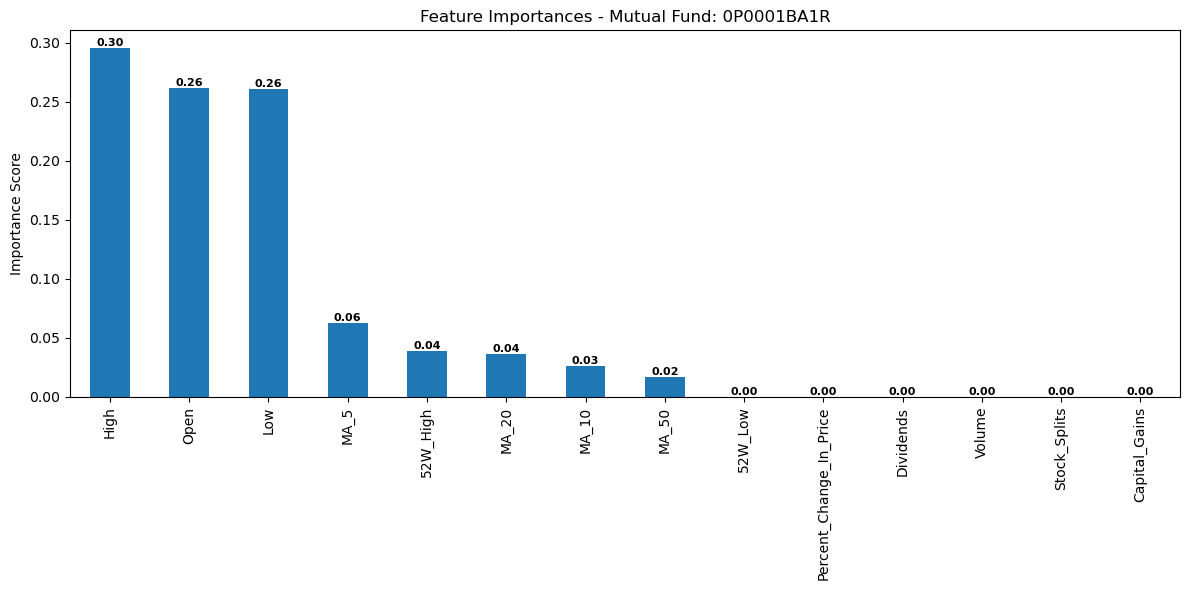


Processing Mutual Fund: 0P00005WEY

Mutual Fund: 0P00005WEY - Feature Importances:
Low                        0.166851
MA_5                       0.141267
Open                       0.131400
52W_High                   0.125701
High                       0.122243
MA_20                      0.109462
MA_10                      0.094592
MA_50                      0.093156
52W_Low                    0.015320
Percent_Change_In_Price    0.000008
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


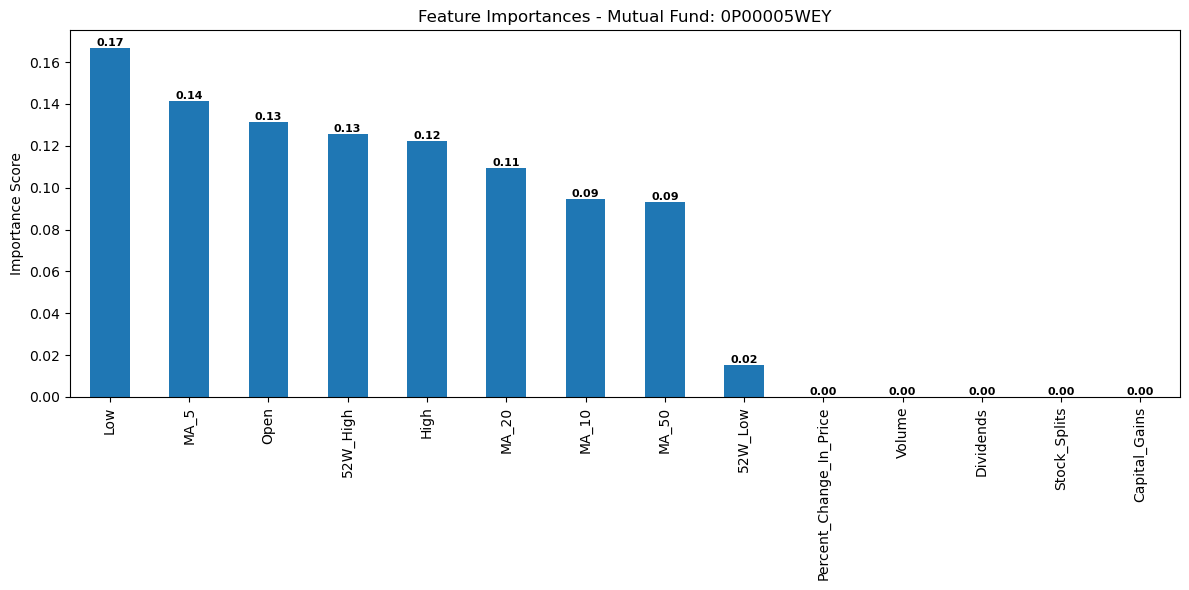


Processing Mutual Fund: 0P0000XUXL

Mutual Fund: 0P0000XUXL - Feature Importances:
Low                        0.149197
MA_5                       0.139563
52W_High                   0.132725
Open                       0.125877
High                       0.114305
MA_20                      0.108022
MA_10                      0.093527
MA_50                      0.084917
52W_Low                    0.051866
Percent_Change_In_Price    0.000002
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


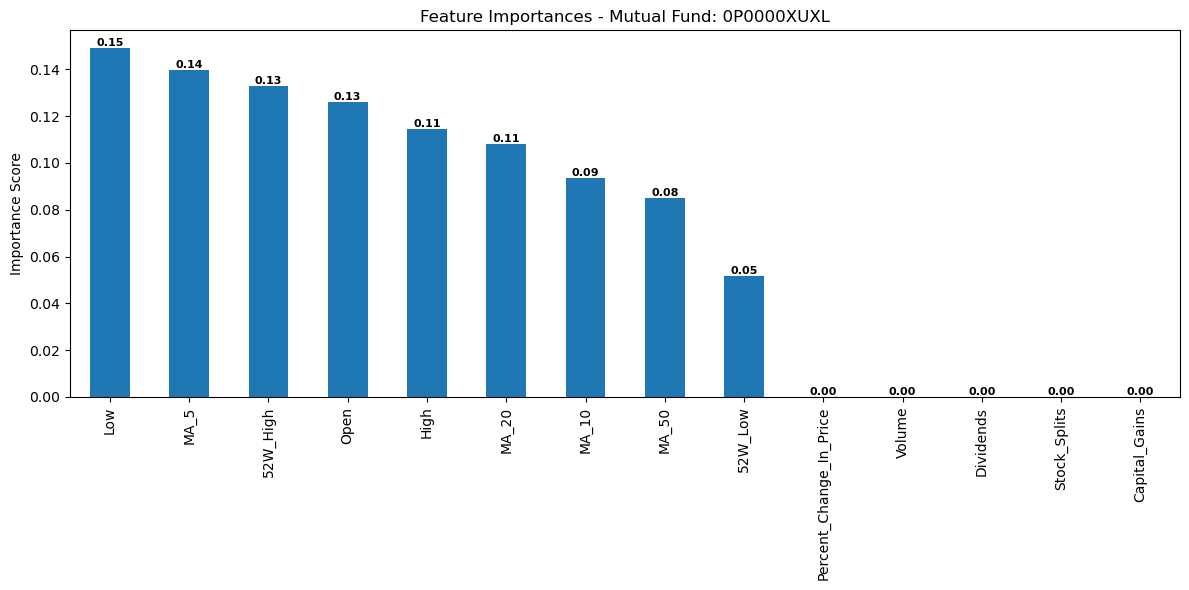


Processing Mutual Fund: 0P0000XUYZ

Mutual Fund: 0P0000XUYZ - Feature Importances:
Low                        0.149742
MA_5                       0.141876
52W_High                   0.129126
High                       0.128665
Open                       0.110714
MA_20                      0.100871
MA_10                      0.092889
MA_50                      0.085407
52W_Low                    0.060709
Percent_Change_In_Price    0.000001
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


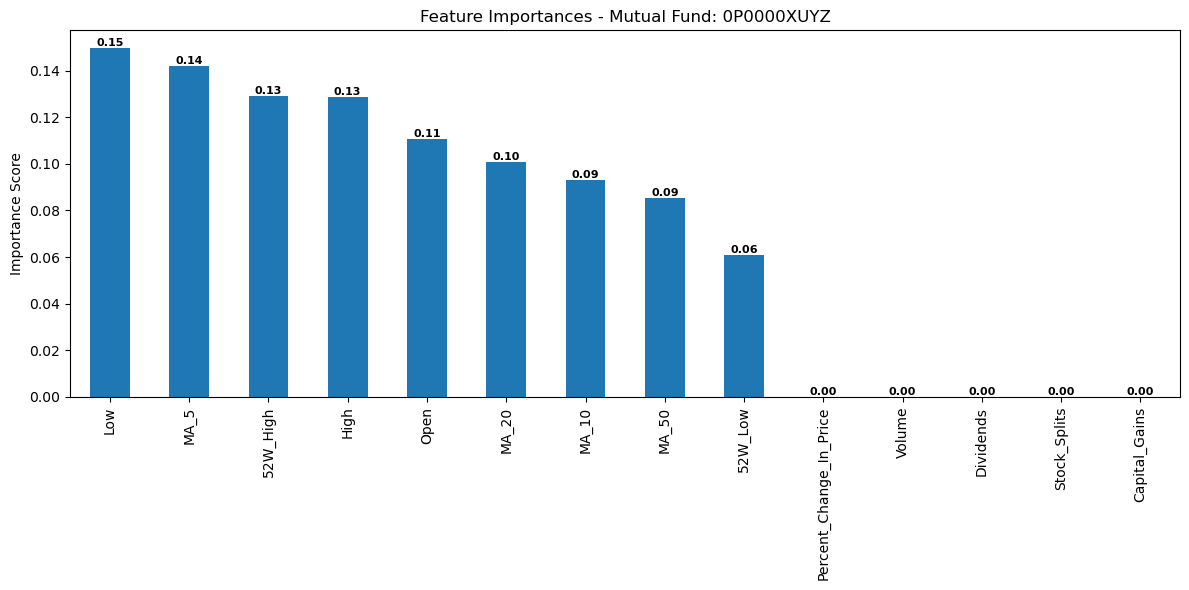


Processing Mutual Fund: 0P0000XW8D

Mutual Fund: 0P0000XW8D - Feature Importances:
Low                        0.193175
Open                       0.138723
52W_High                   0.135260
MA_5                       0.130922
High                       0.128922
MA_10                      0.096150
MA_20                      0.089010
MA_50                      0.064832
52W_Low                    0.023005
Percent_Change_In_Price    0.000002
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


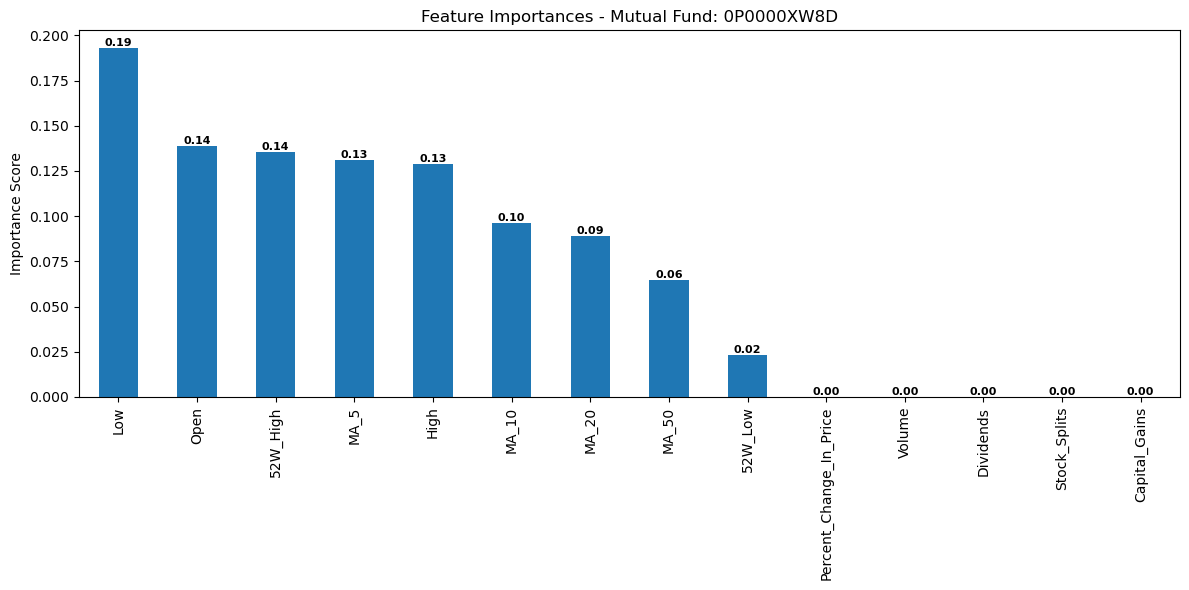


Processing Mutual Fund: 0P0000XVER

Mutual Fund: 0P0000XVER - Feature Importances:
Low                        0.142119
52W_High                   0.135508
MA_5                       0.131871
Open                       0.113340
High                       0.109604
MA_10                      0.096149
52W_Low                    0.095779
MA_20                      0.090773
MA_50                      0.084856
Percent_Change_In_Price    0.000001
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


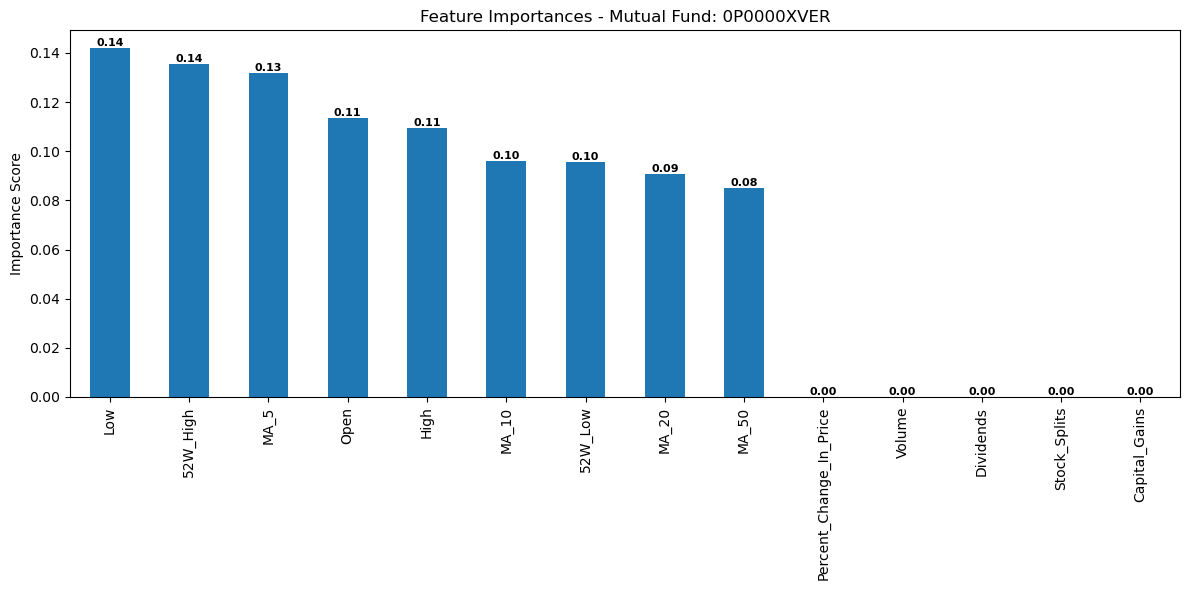


Processing Mutual Fund: 0P0000XUYS

Mutual Fund: 0P0000XUYS - Feature Importances:
Low                        2.144761e-01
Open                       1.806606e-01
High                       1.628809e-01
MA_5                       1.176765e-01
52W_High                   1.029927e-01
MA_20                      8.149272e-02
MA_10                      7.366226e-02
MA_50                      6.614929e-02
Percent_Change_In_Price    7.985395e-06
52W_Low                    8.599236e-07
Volume                     0.000000e+00
Dividends                  0.000000e+00
Stock_Splits               0.000000e+00
Capital_Gains              0.000000e+00
dtype: float64


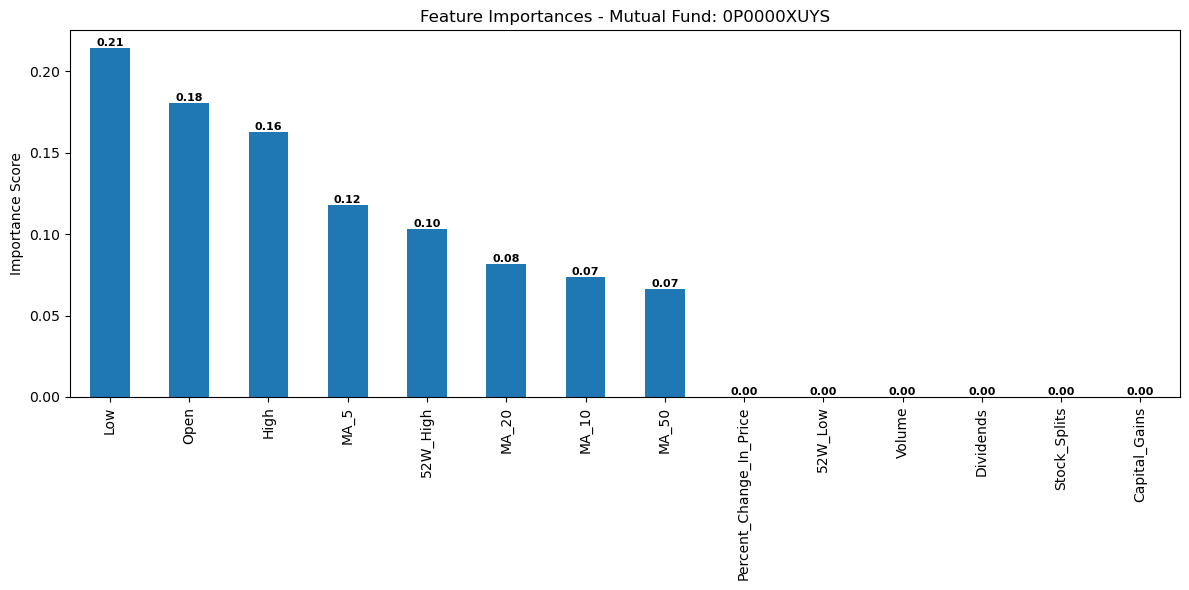


Processing Mutual Fund: 0P0000XW7I

Mutual Fund: 0P0000XW7I - Feature Importances:
Open                       0.342145
Low                        0.332635
High                       0.284365
MA_10                      0.012406
52W_High                   0.009414
MA_20                      0.008988
MA_5                       0.007405
MA_50                      0.002628
52W_Low                    0.000009
Percent_Change_In_Price    0.000007
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


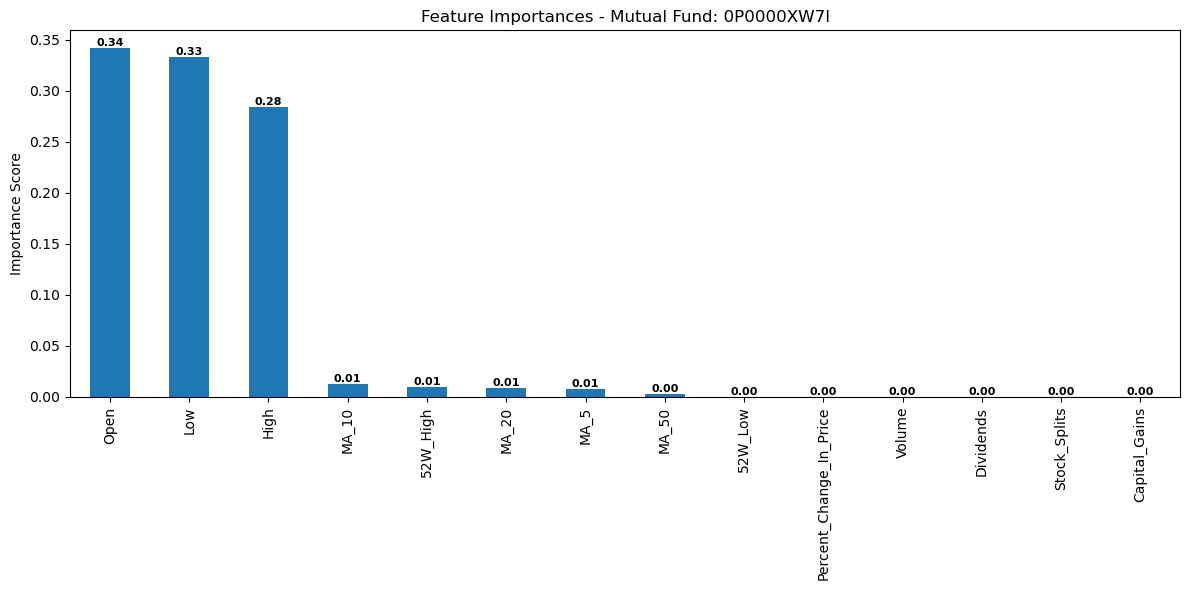


Processing Mutual Fund: 0P0000U3OG

Mutual Fund: 0P0000U3OG - Feature Importances:
Low                        0.329418
Open                       0.328081
High                       0.284559
MA_5                       0.021108
52W_High                   0.020596
MA_10                      0.006544
MA_50                      0.005179
MA_20                      0.003112
52W_Low                    0.001398
Percent_Change_In_Price    0.000004
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


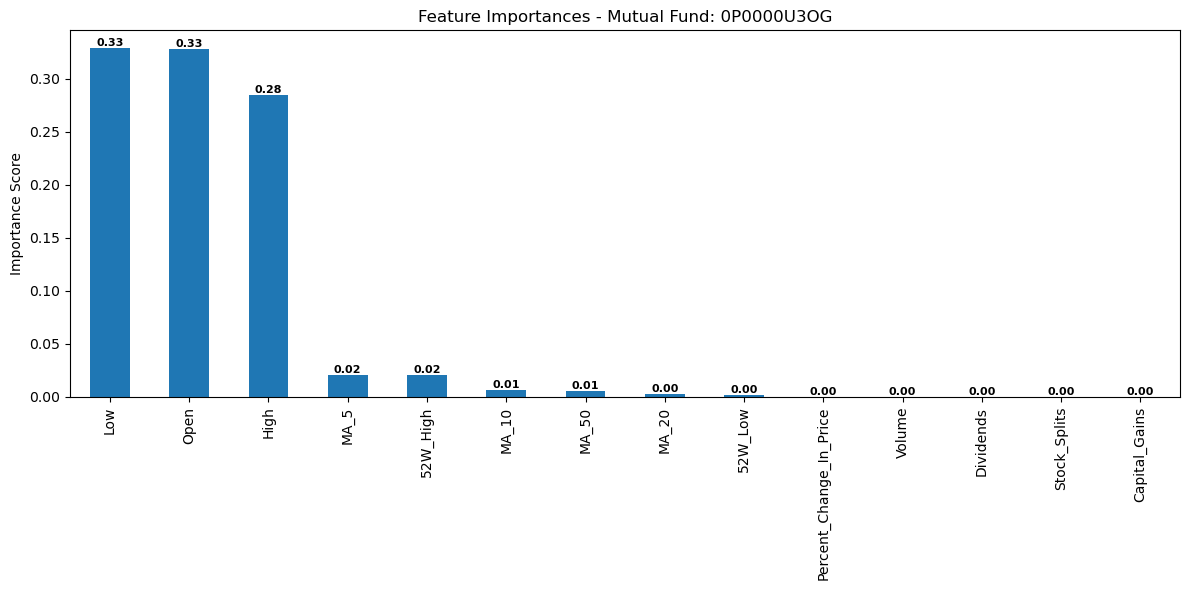


Processing Mutual Fund: SETFGOLD

Mutual Fund: SETFGOLD - Feature Importances:
Open                       0.287867
High                       0.229982
Low                        0.204056
52W_Low                    0.197714
MA_5                       0.040567
MA_10                      0.039628
MA_20                      0.000093
MA_50                      0.000072
52W_High                   0.000016
Percent_Change_In_Price    0.000003
Volume                     0.000001
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


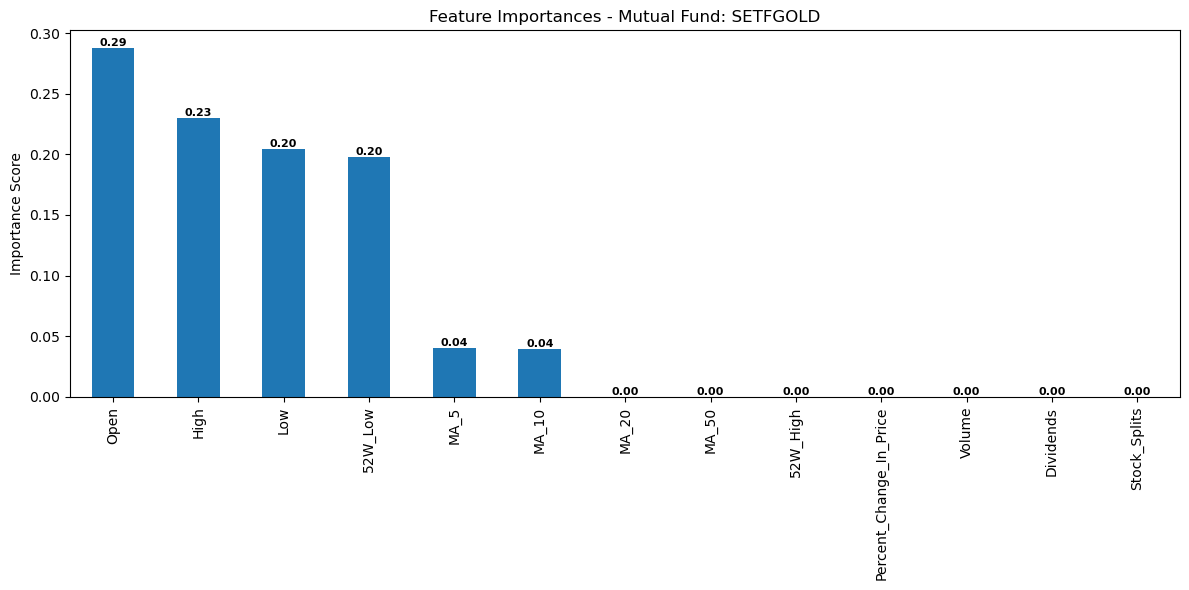


Processing Mutual Fund: BSLGOLDETF

Mutual Fund: BSLGOLDETF - Feature Importances:
Open                       0.286915
Low                        0.230915
High                       0.214860
52W_Low                    0.184339
MA_5                       0.034863
MA_50                      0.027693
MA_10                      0.015886
52W_High                   0.002830
MA_20                      0.001633
Percent_Change_In_Price    0.000053
Volume                     0.000011
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


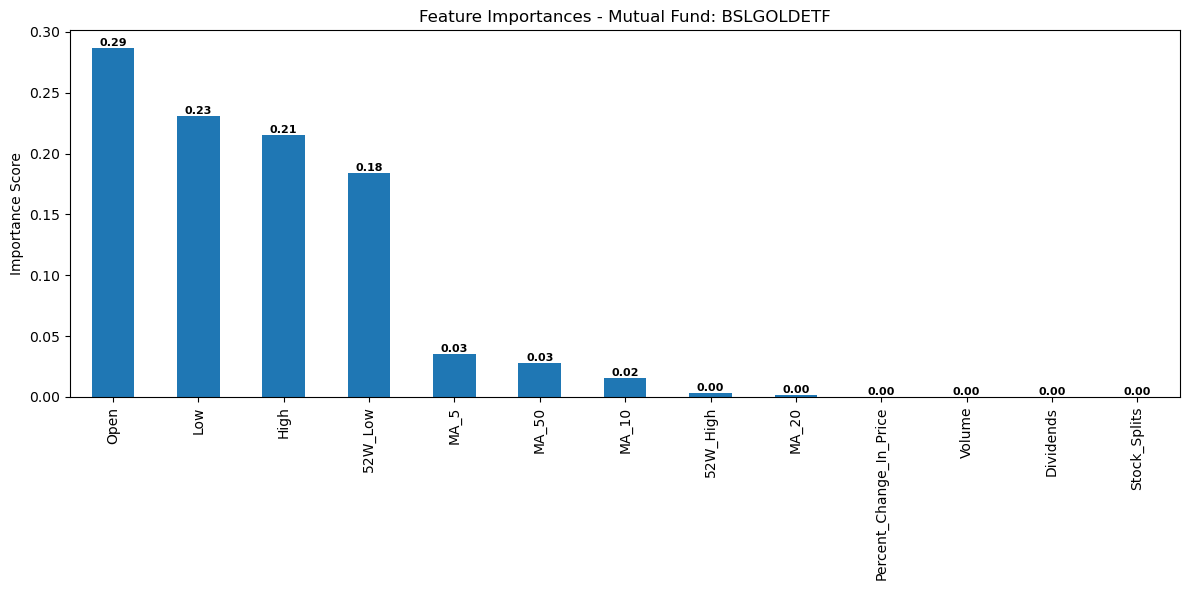

In [40]:
mutual_funds_excel_file = '../Data/Mutual_Funds_Data.xlsx'
all_mutual_funds = pd.read_excel(mutual_funds_excel_file, sheet_name=None)

print("### Feature Selection for Each Mutual Fund ###")
for sheet_name, df in all_mutual_funds.items():
    asset_identifier = f"Mutual Fund: {sheet_name}"
    print(f"\nProcessing {asset_identifier}")
    feat_imp = select_features_rf(df, asset_name=asset_identifier)

### Feature Selection for Gold Bonds

### Feature Selection for Gold Bonds ###

Gold Bonds - Feature Importances:
Ltp                        0.443666
High                       0.177134
Vwap                       0.093182
Low                        0.059929
Open                       0.055699
MA_50                      0.035623
MA_20                      0.031754
MA_10                      0.029413
MA_5                       0.022339
52W_H                      0.017109
Prev_Close                 0.016354
52W_High                   0.016253
52W_L                      0.001460
Percent_Change_In_Price    0.000032
Value                      0.000020
Volume                     0.000015
No_Of_Trades               0.000012
52W_Low                    0.000005
dtype: float64


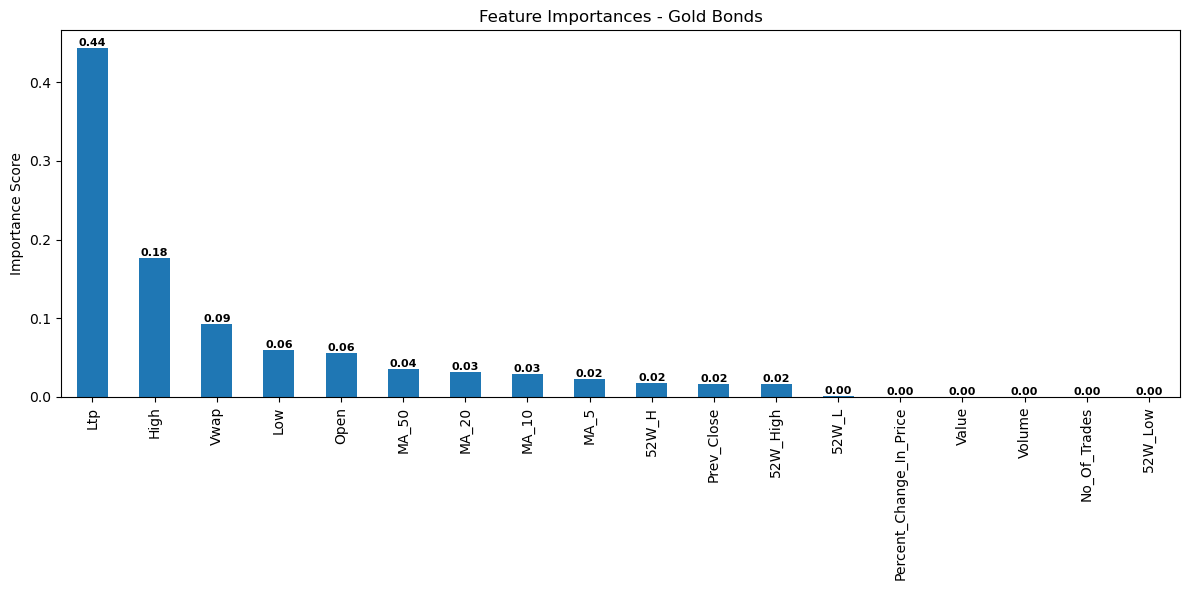

In [44]:
gold_bonds_file = '../Data/Gold_Bond_Data.xlsx'
gold_df = pd.read_excel(gold_bonds_file)

print("### Feature Selection for Gold Bonds ###")
feat_imp_gold = select_features_rf(gold_df, asset_name="Gold Bonds")